# Valluru Sateesh Reddy
# BL.EN.U4AIE21138 (LAB-2)

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''A1. Find the first derivative of your speech signal with finite difference method. Listen to the first
derivative signal and the original speech signal.
'''

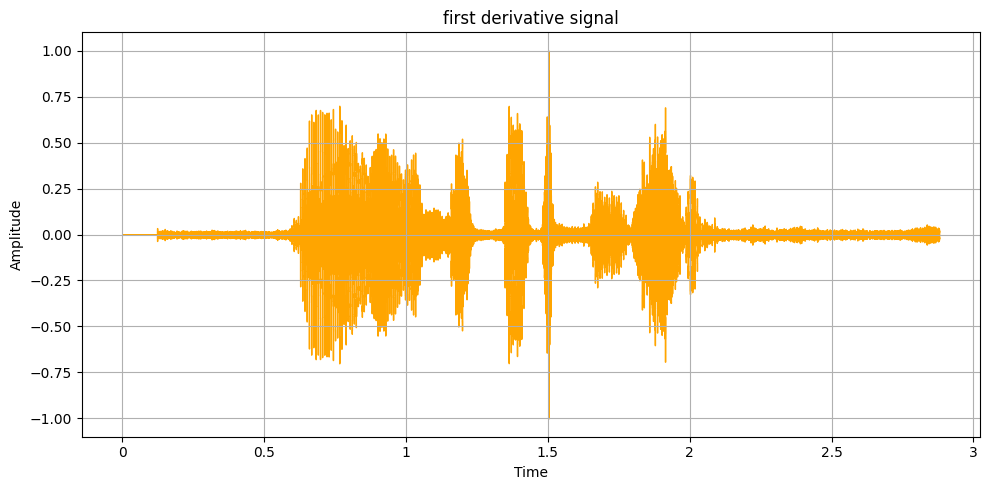

Playing First Derivative Signal:


In [3]:
y, rs = librosa.load('/content/drive/MyDrive/SpeechProcessing.mpeg')
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=rs,color='orange')
plt.title('first derivative signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Playing First Derivative Signal:")
ipd.Audio(derivative_1, rate=rs)

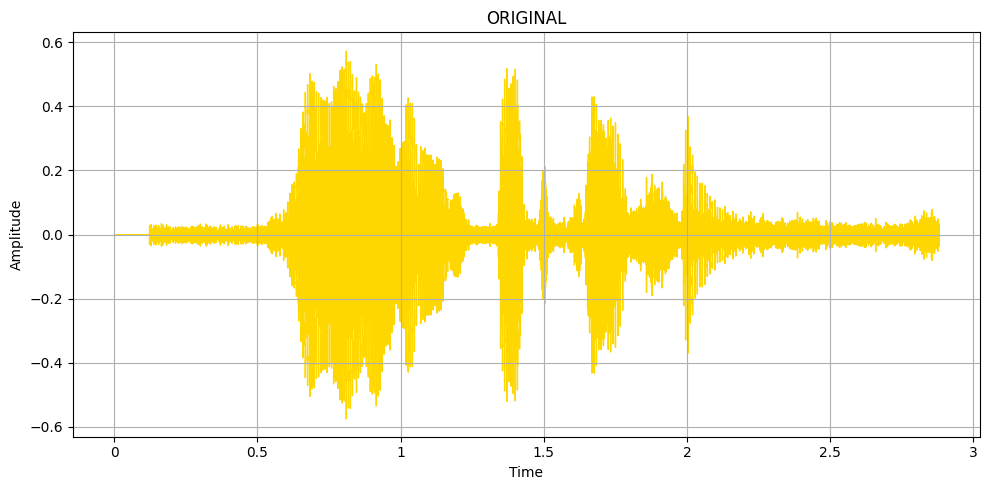

Original Signal


In [4]:
#ORIGINAL SIGNAL

y, rs = librosa.load('/content/drive/MyDrive/SpeechProcessing.mpeg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=rs,color='gold')
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Original Signal')
ipd.Audio(y, rate=rs)

In [ ]:
'''A2. Detect the points of zero crossing in the first derivative signal. Compare the average length
between two consecutive zero crossings for speech and silence regions. Observe the pattern.
'''

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-5-754d3aa9e114>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'red')
<ipython-input-5-754d3aa9e114>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'blue')


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.499457607764773


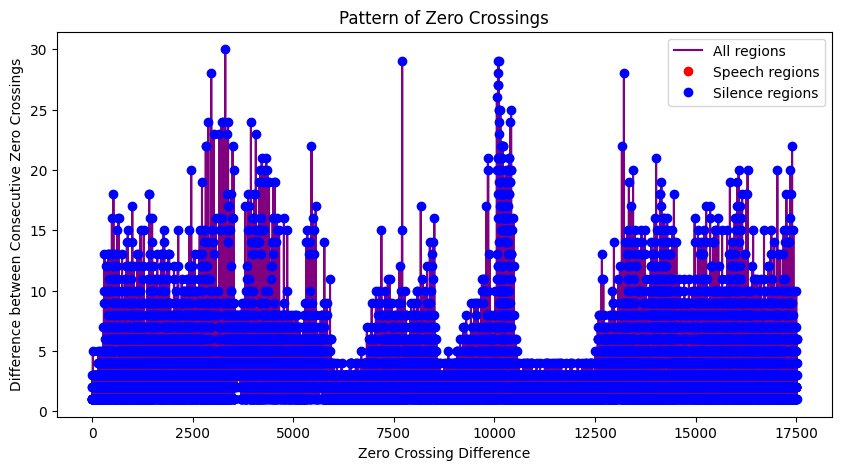

Pattern of Zero Crossings:
All regions: [2 1 1 ... 6 4 3]
Speech regions: []
Silence regions: [2 1 1 ... 6 4 3]


In [5]:
zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'purple')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'red')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'blue')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)


In [ ]:
'''A3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of
your spoken words with those of your project team-mate.
'''

<ipython-input-9-ad9093bf6fdd>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load(y)


The length Duration of first audio file: 7.52 seconds
The length Duration of Second audio file: 6.805351473922903 seconds


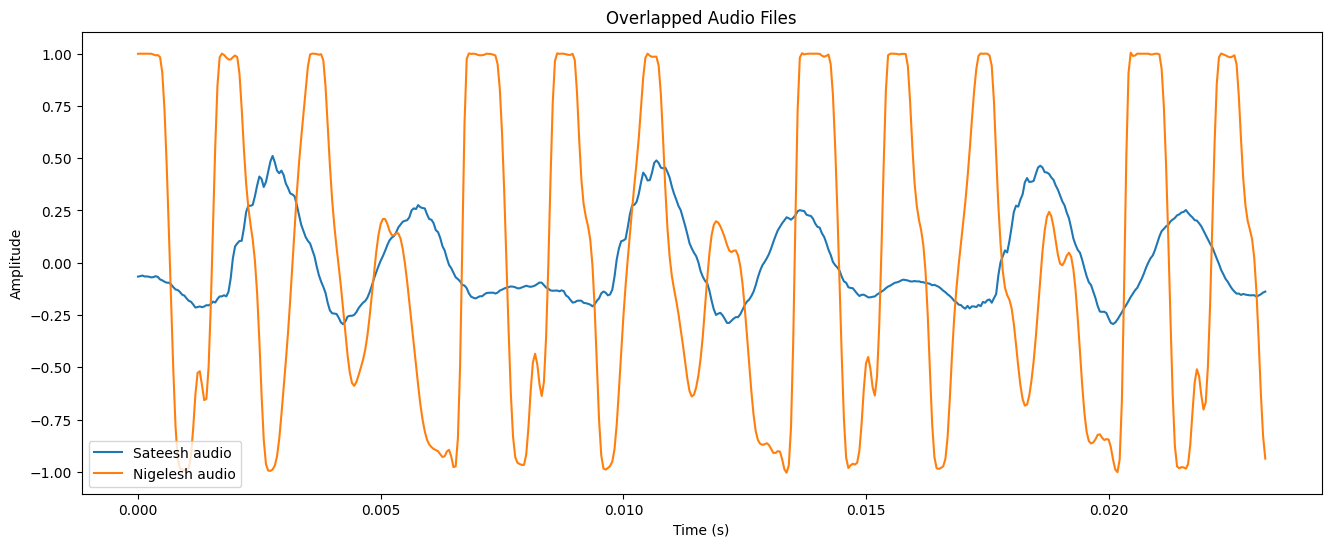

In [9]:
x = r'/content/drive/MyDrive/Words.mpeg'
y = r'/content/drive/MyDrive/words1.m4a'

# Load audio signals
y1, sr1 = librosa.load(x)
y2, sr2 = librosa.load(y)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
A = remove_silence(y1, sr1)
B = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(A) / sr1, len(A))
time2 = np.linspace(0, len(B) / sr2, len(B))

# Plot the trimmed audio files
plt.figure(figsize=(16, 6))
plt.plot(time1, A, label='Sateesh audio')
plt.plot(time2, B, label='Nigelesh audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

In [ ]:
'''A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are
going to college on Sunday(./?)”. Record two signals – one with making the statement while other
with asking question. Study the two signals and compare them
'''

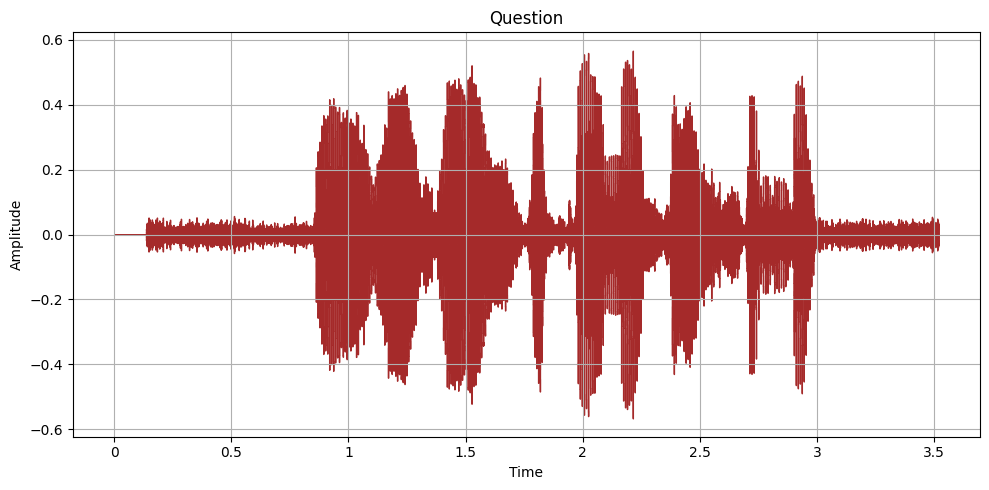

Question Audio


In [10]:
y, rs = librosa.load('/content/drive/MyDrive/Question.mpeg')
question, rs = librosa.load('/content/drive/MyDrive/Question.mpeg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(question, sr=rs,color='brown')
plt.title('Question')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
print('Question Audio')
ipd.Audio(y, rate=rs)

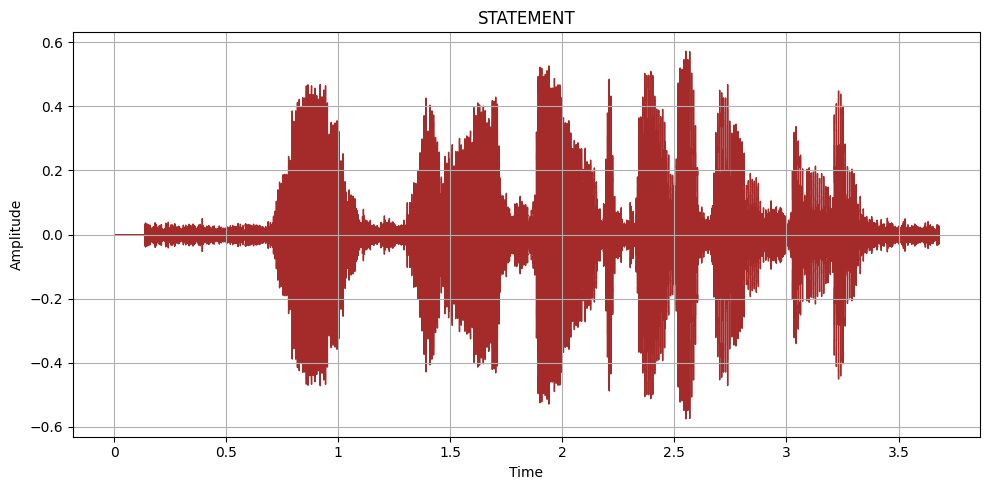

Statement Audio


In [12]:
y, rs = librosa.load('/content/drive/MyDrive/Statement.mpeg')
statement, rs = librosa.load('/content/drive/MyDrive/Statement.mpeg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=rs,color='brown')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
print('Statement Audio')
ipd.Audio(y, rate=rs)